<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/gmm-iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

各クラスを混合正規分布で近似して，事後確率を計算し，識別に利用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import mixture

In [2]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

print(y)

X1 = X[y == 0,:]
X2 = X[y == 1,:]
X3 = X[y == 2,:]

Size of the data =  (150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# fit a Gaussian Mixture Model with three components
clf1 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

print('G\n', G)

print('Arg_max\n', np.argmax(G, axis=1))

print('Confusion Matrix\n', confusion_matrix(y, np.argmax(G, axis=1)))

G
 [[ 8.05871365e-01 -7.97505586e+00 -1.30202012e+01]
 [-4.00369273e-01 -7.35318755e+00 -7.65430925e+00]
 [ 2.46328560e-01 -1.15814626e+01 -1.27441030e+01]
 [ 5.56988959e-02 -1.28064889e+01 -1.23917964e+01]
 [-7.49239732e-02 -9.76613308e+00 -1.30442319e+01]
 [-2.03827587e-01 -8.78666338e+00 -9.17523986e+00]
 [-5.54582287e-01 -1.40473209e+01 -1.79601205e+01]
 [ 9.81192699e-01 -8.47378176e+00 -1.27672183e+01]
 [-9.11803990e-01 -1.50193256e+01 -1.22011625e+01]
 [-5.94137631e-02 -8.20626563e+00 -8.90668717e+00]
 [-5.48701098e-01 -6.89220628e+00 -6.13000984e+00]
 [ 4.52928280e-01 -1.10308782e+01 -1.52264682e+01]
 [-5.33710316e-02 -8.86699526e+00 -8.69039299e+00]
 [-1.60666724e+00 -1.80049183e+01 -1.49012417e+01]
 [-1.95497306e+00 -8.12762550e+00 -1.64271727e+01]
 [-2.45518791e+00 -1.37390439e+01 -3.26959463e+01]
 [-2.03827587e-01 -8.78666338e+00 -9.17523986e+00]
 [ 8.05871365e-01 -7.97505586e+00 -1.30202012e+01]
 [-2.04721877e+00 -6.27471211e+00 -7.12838358e+00]
 [-3.64028388e-01 -1.0346786

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


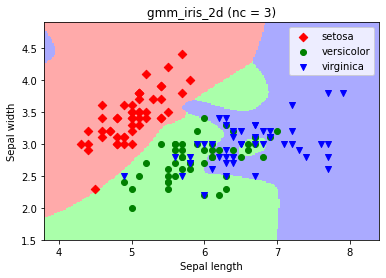

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Z=[]
G=np.zeros((3))
for Xvec in np.c_[xx.ravel(), yy.ravel()]:
#    print(X)
    Xp = np.array(Xvec, ndmin=2)
    G[0] = clf1.score_samples(Xp)
    G[1] = clf2.score_samples(Xp)
    G[2] = clf3.score_samples(Xp)
    Z.append(np.argmax(G))
Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 3)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm3_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [5]:
# fit a Gaussian Mixture Model with five components
clf1 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

print('G\n', G)

print('Arg_max\n', np.argmax(G, axis=1))

print('Confusion Matrix\n', confusion_matrix(y, np.argmax(G, axis=1)))

G
 [[ 8.63681317e-01 -1.39712362e+01 -1.28781513e+01]
 [ 8.26447671e-01 -6.47259960e+00 -4.13963394e+01]
 [ 5.71371887e-01 -1.23162221e+01 -3.91179781e+01]
 [-1.73926971e-01 -1.04836319e+01 -5.10002102e+01]
 [ 1.28629399e-01 -1.94726001e+01 -1.27196030e+01]
 [-3.61176778e-01 -1.46497254e+01 -1.00146237e+01]
 [-8.92904718e-01 -2.00962770e+01 -3.05538180e+01]
 [ 9.40640171e-01 -1.72756013e+01 -1.84077986e+01]
 [ 1.50266558e-01 -1.44641999e+01 -7.28684397e+01]
 [ 7.60295925e-01 -9.18210301e+00 -3.83299774e+01]
 [-9.76922748e-01 -1.58295326e+01 -6.74890980e+00]
 [ 3.88774719e-01 -2.18877909e+01 -2.40842887e+01]
 [ 4.69721508e-01 -6.98147501e+00 -4.71199093e+01]
 [-1.64083849e+00 -1.64310028e+01 -7.53576751e+01]
 [-1.25960302e+00 -6.54053029e+00 -1.60235430e+01]
 [-1.66191499e+00 -1.19483619e+01 -3.92594475e+01]
 [-3.61176778e-01 -1.46497254e+01 -1.00146237e+01]
 [ 8.63681317e-01 -1.39712362e+01 -1.28781513e+01]
 [-1.46850490e+00 -4.95010523e+00 -7.55807214e+00]
 [-2.09163506e-02 -2.1626215

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


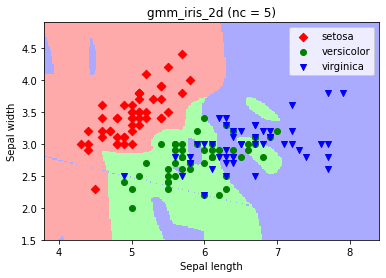

In [6]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Z=[]
G=np.zeros((3))
for Xvec in np.c_[xx.ravel(), yy.ravel()]:
#    print(X)
    Xp = np.array(Xvec, ndmin=2)
    G[0] = clf1.score_samples(Xp)
    G[1] = clf2.score_samples(Xp)
    G[2] = clf3.score_samples(Xp)
    Z.append(np.argmax(G))
Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 5)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm5_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()